In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import io
import os
import py3Dmol


from linux_qm.qm.crest import crest
from linux_qm.qm.crest.crest import conformer_pipeline
from linux_qm.src.util import draw3Dconfs
from rdkit import Chem
from rdkit.Chem import AllChem


In [67]:
# smi = 'COC1CN(C(=O)C(C)(C)(C))C1'
smi = 'COC1=CC=CC([C@](O2)(CN3C=CN=C3)OC[C@H]2COC4=CC=CC=C4)=C1'
# smi = 'COC1CNC1'

# mol = conformer_pipeline(smi, n_jobs=24)
query = Chem.MolFromSmarts('C1CCN1')
mol = crest.load_smiles3D(smi)

# print(AllChem.GetConformerRMSMatrix(mol))
draw3Dconfs(mol)

num conformers 1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
# crest.xtb_optimize('input.xyz')

In [61]:
root_dir = '/home/ergot/linux_qm/notebooks' 
os.chdir(root_dir)
os.makedirs('.crest_tmp', exist_ok=True)
os.chdir('.crest_tmp')

fname = crest._create_input_file(mol)
output = crest.conformer_gen(fname, n_jobs=24, verbose=True)
print('Conformers Num:', len(crest._read_conformers('crest_conformers.xyz')))

crest input.xyz  -gfnff -quick -ewin 6.0000 -mdlen 15.0000 -mddump 250.0000 -vbdump 1.0000 -T 24
Conformers Num: 18


In [68]:
mol.RemoveAllConformers()
crest.add_conformers(mol, 'crest_conformers.xyz')

# query = Chem.MolFromSmarts('cccccc')

atom_map = mol.GetSubstructMatch(query)
AllChem.AlignMolConformers(mol, atomIds=atom_map)

draw3Dconfs(mol, autoalign=False)

FileNotFoundError: [Errno 2] No such file or directory: 'crest_conformers.xyz'

In [63]:
fname = 'crest_conformers.xyz'
output = crest.conformer_screen(fname, n_jobs=24, verbose=True)
print('Conformers Num:', len(crest._read_conformers('crest_ensemble.xyz')))
# print(output.stdout)

crest -screen crest_conformers.xyz -gfn2 -ewin 6.0 -T 24 
Conformers Num: 7


In [64]:
mol.RemoveAllConformers()
crest.add_conformers(mol, 'crest_ensemble.xyz')

atom_map = mol.GetSubstructMatch(query)
AllChem.AlignMolConformers(mol, atomIds=atom_map)

draw3Dconfs(mol, autoalign=False)

num conformers 7


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [65]:
!crest --for crest_ensemble.xyz --cluster


       |                                            |
       |                 C R E S T                  |
       |                                            |
       |  Conformer-Rotamer Ensemble Sampling Tool  |
       |          based on the GFN methods          |
       |             P.Pracht, S.Grimme             |
       |          Universitaet Bonn, MCTC           |
       Version 2.12,   Thu 19. Mai 16:32:32 CEST 2022
  Using the xTB program. Compatible with xTB version 6.4.0

   Cite work conducted with this code as

   • P.Pracht, F.Bohle, S.Grimme, PCCP, 2020, 22, 7169-7192.
   • S.Grimme, JCTC, 2019, 15, 2847-2862.

   and for works involving QCG as

   • S.Spicher, C.Plett, P.Pracht, A.Hansen, S.Grimme,
     JCTC, 2022, 18 (5), 3174-3189.

   with help from:
   C.Bannwarth, F.Bohle, S.Ehlert, S.Grimme,
   C.Plett, P.Pracht, S.Spicher

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   M

In [66]:
mol.RemoveAllConformers()
crest.add_conformers(mol, 'crest_clustered.xyz')

atom_map = mol.GetSubstructMatch(query)
AllChem.AlignMolConformers(mol, atomIds=atom_map)

draw3Dconfs(mol, autoalign=False)

num conformers 4


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

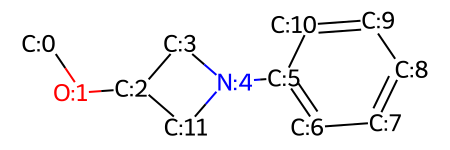

In [6]:
# smi = 'OC1CC(Nc2ccccc2)C1'
smi = 'COC1CN(c2ccccc2)C1'


# mol = conformer_pipeline(smi, n_jobs=8)

mol2d = Chem.MolFromSmiles(smi)
for atom in mol2d.GetAtoms():
    # if atom.GetSymbol() != 'H':
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
mol2d

In [8]:
import numpy as np

rms_matr = np.empty((mol.GetNumConformers(), mol.GetNumConformers()))
conf_ids = [conf.GetId() for conf in mol.GetConformers()]

for i in conf_ids:
    for j in conf_ids:
        rms_matr[i,j] = AllChem.GetConformerRMS(mol, i, j)
        
print(np.array2string(rms_matr, max_line_width=80, precision=3, separator='  '))

[[0.]]


In [34]:
# query = Chem.MolFromSmarts('cccccc')
query = Chem.MolFromSmarts('cccccc')
atom_map = mol.GetSubstructMatch(query)

print(atom_map)

AllChem.AlignMolConformers(mol, atomIds=atom_map)
# AllChem.AlignMolConformers(mol, maxIters=1000)

viewer = py3Dmol.view(width=600, height=400)

for conf in mol.GetConformers():
    # if conf.GetId() in [1, 2]:
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    # print(conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

(5, 6, 7, 10, 11, 12)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol